In [77]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from astropy.units import au
from numpy.polynomial import polynomial as P

In [78]:
data_file = pd.read_csv("~/RustroverProjects/nbodyproblem/orbital_simulation.csv",
                        header=0,
                        skiprows=[1, 2, 3],
                        low_memory=False)

names = pd.read_csv("~/RustroverProjects/nbodyproblem/orbital_simulation.csv", nrows=1,header=None).iloc[0]
one_au = au.to('m')
zoom = 1.5 * one_au

In [79]:
one_au = au.to('m')
zoom = 1.5 * one_au
SECONDS_PER_YEAR = 31556926


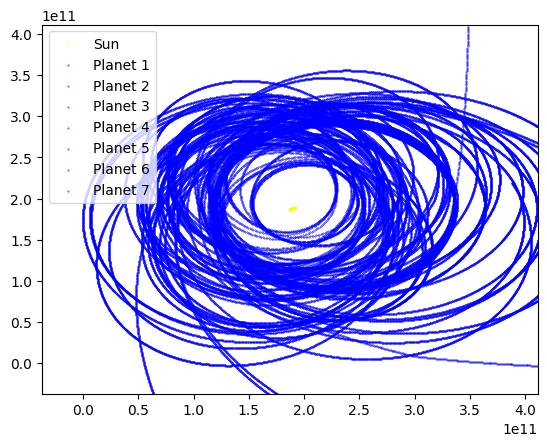

In [106]:
for i in range(8):

    pos_x = data_file.iloc[:, 2*i+4]
    pos_y = data_file.iloc[:, 2*i+5]
    if i == 0:
        real_color = "yellow"
        plt.scatter(pos_x, pos_y, s=0.1, label=names[2*i+4][17:-42].strip(), color=real_color)

    elif i == 1:
        real_color = "blue"
        plt.scatter(pos_x, pos_y, s=0.1, label=names[2*i+4][17:-38].strip(), color=real_color)

    else:
        real_color = "blue"
        plt.scatter(pos_x, pos_y, s=0.1, label=names[2*i+4][17:-38].strip(), color=real_color)



center_x = data_file.iloc[3, 4]
center_y = data_file.iloc[3, 5]
plt.xlim(center_x - zoom, center_x + zoom)
plt.ylim(center_y - zoom, center_y + zoom)
plt.legend()
plt.show()


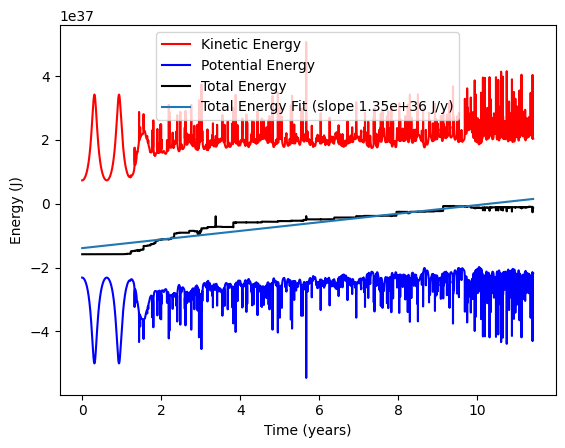

In [83]:
kinetic_energy = data_file.iloc[:, 1]
potential_energy = data_file.iloc[:, 2]
total_energy = data_file.iloc[:, 3]
time = data_file.iloc[:, 0]

kinetic_energy = pd.to_numeric(kinetic_energy, errors='coerce')
potential_energy = pd.to_numeric(potential_energy, errors='coerce')
total = pd.to_numeric(total_energy, errors='coerce')
time = pd.to_numeric(time, errors='coerce')

energy_data = pd.DataFrame({'time': time, 'ke': kinetic_energy, 'pe': potential_energy, 'total': total})
energy_data = energy_data.dropna(subset=['time'])
time_years = energy_data['time'] / SECONDS_PER_YEAR



coefficents_of_trendline = np.polyfit(energy_data['time'], energy_data['total'], 1)
trendline = np.polyval(coefficents_of_trendline, energy_data['time'])
slope_per_year = coefficents_of_trendline[0] * SECONDS_PER_YEAR

plt.plot(time_years, energy_data['ke'], label="Kinetic Energy", color='red')
plt.plot(time_years, energy_data['pe'], label="Potential Energy", color='blue')
plt.plot(time_years, energy_data['total'], label="Total Energy", color='black')
plt.plot(time_years, trendline, label = f"Total Energy Fit (slope {slope_per_year:.2e} J/y)")

plt.xlabel("Time (years)")  # Label was wrong — said seconds, not years
plt.ylabel("Energy (J)")
plt.legend()
plt.show()


